<a href="https://colab.research.google.com/github/danielapavas/Optimizacion/blob/main/Metodo_de_bisecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÉTODO DE BISECCIÓN**



In [1]:
import matplotlib.pyplot as plt
import numpy as np


Raíz aproximada: 0.84716796875
Valor de la función en la raíz: 0.49292445182800293


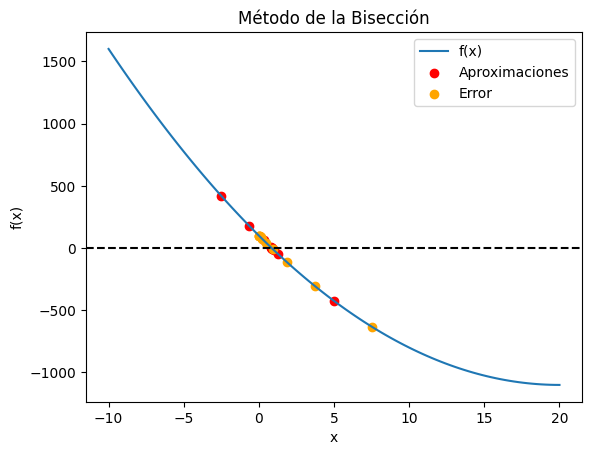


Tabla de datos:
+------------------+----------------------+----------------------+----------------------+----------------------+
| Iteración        | Aproximación         | Error                | xl                   | xu                   |
+------------------+----------------------+----------------------+----------------------+----------------------+
|        1         |      5.00000000      |      7.50000000      |     -10.00000000     |     20.00000000      |
|        2         |     -2.50000000      |      3.75000000      |     -10.00000000     |      5.00000000      |
|        3         |      1.25000000      |      1.87500000      |     -2.50000000      |      5.00000000      |
|        4         |     -0.62500000      |      0.93750000      |     -2.50000000      |      1.25000000      |
|        5         |      0.31250000      |      0.46875000      |     -0.62500000      |      1.25000000      |
|        6         |      0.78125000      |      0.23437500      |      0.31250

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def biseccion(funcion, xl, xu, tolerancia, maximo):
    if funcion(xl) * funcion(xu) >= 0:
        raise ValueError("La función no cumple con el teorema de Bolzano en el intervalo dado.")

    i = 0
    listaError = []
    listaAproximacion = []
    listaXL = []  # Lista para almacenar xl en cada iteración
    listaXU = []  # Lista para almacenar xu en cada iteración

    while (xu - xl) / 2 > tolerancia and i < maximo:
        xr = (xl + xu) / 2
        listaAproximacion.append(xr)
        listaXL.append(xl)  # Agregar xl actual a la lista
        listaXU.append(xu)  # Agregar xu actual a la lista

        if funcion(xl) * funcion(xr) == 0:
            return xr, listaAproximacion, listaError, listaXL, listaXU

        elif funcion(xl) * funcion(xr) < 0:
            xu = xr
        else:
            xl = xr

        error = abs((xu - xl) / 2)
        listaError.append(error)
        i += 1

    return (xl + xu) / 2, listaAproximacion, listaError, listaXL, listaXU

#ejemplo
def ejemplo(x):
    return 3*x**2 - 120*x +100

xl = -10
xu = 20
tolerancia = 0.01
maximo = 100

root, listaAproximacion, listaError, listaXL, listaXU = biseccion(ejemplo, xl, xu, tolerancia, maximo)
valor_en_raiz = ejemplo(root) # Evaluar la función en la raíz aproximada
print("\nRaíz aproximada:", root)
print("Valor de la función en la raíz:", valor_en_raiz)

# Crear gráfica si hay datos
if listaAproximacion:
    x = np.linspace(xl, xu, 100)
    y = ejemplo(x)

    plt.plot(x, y, label='f(x)')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.scatter(listaAproximacion, [ejemplo(x) for x in listaAproximacion], color='red', label='Aproximaciones')
    plt.scatter(listaError, [ejemplo(x) for x in listaError], color='orange', label='Error')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.title('Método de la Bisección')
    plt.show()

    # Crear tabla de datos si hay datos
    if listaError:
        print("\nTabla de datos:")
        print("+------------------+----------------------+----------------------+----------------------+----------------------+")
        print("| Iteración        | Aproximación         | Error                | xl                   | xu                   |")
        print("+------------------+----------------------+----------------------+----------------------+----------------------+")
        for i in range(len(listaAproximacion)):
            print(f"| {i+1:^16} | {listaAproximacion[i]:^20.8f} | {listaError[i]:^20.8f} | {listaXL[i]:^20.8f} | {listaXU[i]:^20.8f} |")
        print("+------------------+----------------------+----------------------+----------------------+----------------------+")


# **MÉTODO DE INTERPOLACIÓN CUADRÁTICA**


Valor máximo de f(x) = 1.77143091252755 en x = 1.4902527508500858

Valor mínimo de f(x) = 1.77143091252755 en x = 1.4902527508500858


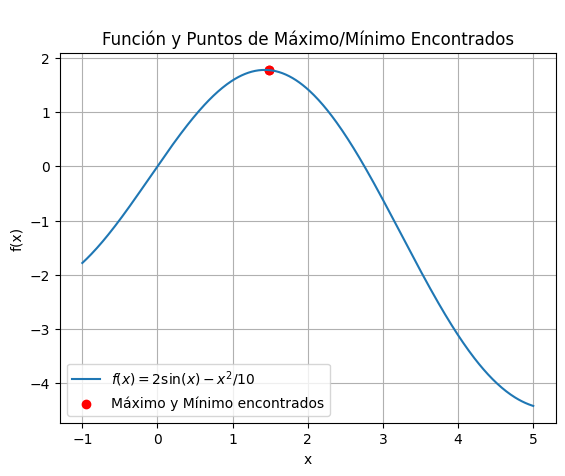


Tabla de Datos (Máximos):
Iteración  x0         x1         x2         x3         f(x3)           Error     
1          1.000000   1.505535   4.000000   1.505535   1.769079        0.186137  
2          1.000000   1.490253   1.490253   1.490253   1.771431        0.002352  

Tabla de Datos (Mínimos):
Iteración  x0         x1         x2         x3         f(x3)           Error     
1          1.000000   1.505535   4.000000   1.505535   1.769079        0.186137  
2          1.000000   1.490253   1.490253   1.490253   1.771431        0.002352  


In [15]:
def f(x):
    return 2 * np.sin(x) - x**2 / 10

def interpolacionCuadratica(f, x0, x1, x2, minimize=True, tol=0.01, maximo=10):
    history = []  # Almacenar datos para la tabla

    for i in range(maximo):
        fx0 = f(x0)
        fx1 = f(x1)
        fx2 = f(x2)

        # Calcular x3 mediante la fórmula dada
        x3 = (fx0 * (x1**2 - x2**2) + fx1 * (x2**2 - x0**2) + fx2 * (x0**2 - x1**2)) /(2 * fx0 * (x1 - x2) + 2 * fx1 * (x2 - x0) + 2 * fx2 * (x0 - x1))

        vertex_fx = f(x3)

        if vertex_fx >= fx1 and x3 > x1:
                x0 = x1
                x1 = x3
                x2=x2
        elif vertex_fx > fx1 and x3 < x1 :
                x1 = x3
                x2 = x1
                x0=x0

        error = abs(vertex_fx - fx1)
        history.append((i + 1, x0, x1, x2, x3, vertex_fx, error))

        if error < tol * abs(fx1):
            break

    return x1, f(x1), history

x0 = 0
x1 = 1
x2 = 4

# Buscar máximo
max_x, max_valor, max_history = interpolacionCuadratica(f, x0, x1, x2, minimize=False)

# Buscar mínimo
min_x, min_valor, min_history = interpolacionCuadratica(f, x0, x1, x2, minimize=True)

# Imprimir resultados
print("\nValor máximo de f(x) =", max_valor, "en x =", max_x)
print("\nValor mínimo de f(x) =", min_valor, "en x =", min_x)

# Generar gráficos
x_vals = np.linspace(-1, 5, 400)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label='$f(x) = 2\sin(x) - x^2/10$')
plt.scatter([max_x, min_x], [max_valor, min_valor], color='red', marker='o', label='Máximo y Mínimo encontrados')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('\nFunción y Puntos de Máximo/Mínimo Encontrados')
plt.legend()
plt.grid(True)
plt.show()

# Tabla de datos
print("\nTabla de Datos (Máximos):")
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<15} {:<10}".format(
    "Iteración", "x0", "x1", "x2", "x3", "f(x3)", "Error"))
print("="*70)
for entry in max_history:
    print("{:<10} {:<10.6f} {:<10.6f} {:<10.6f} {:<10.6f} {:<15.6f} {:<10.6f}".format(*entry))

print("\nTabla de Datos (Mínimos):")
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<15} {:<10}".format(
    "Iteración", "x0", "x1", "x2", "x3", "f(x3)", "Error"))
print("="*70)
for entry in min_history:
    print("{:<10} {:<10.6f} {:<10.6f} {:<10.6f} {:<10.6f} {:<15.6f} {:<10.6f}".format(*entry))


# **MÉTODO DE LA SECCIÓN DORADA**

Máximo aproximado en x: 1.4264578624800213
Valor máximo: 1.7757243491477843


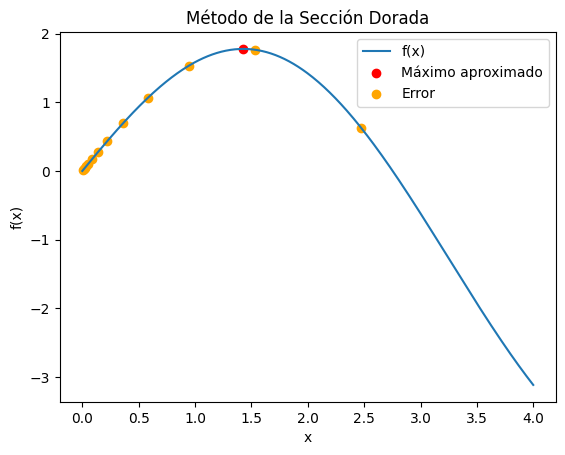


Tabla de datos:
+------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Iteración        | xl                    | xu                    | x1                    | x2                    | Máximo aproximado   | Error                |
+------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
|        1         |      0.00000000      |      2.47213595      |      2.47213595      |      1.52786405      |      1.23606798      |      2.47213595      |
|        2         |      0.94427191      |      2.47213595      |      1.52786405      |      0.94427191      |      1.70820393      |      1.52786405      |
|        3         |      0.94427191      |      1.88854382      |      1.88854382      |      1.52786405      |      1.41640786      |      0.94427191      |
|        4         |      

In [80]:
def seccionDorada(funcion, xl, xu, tolerancia, maximo):
    phi = (1 + (5 ** 0.5)) / 2  # Valor de la razón áurea

    listaError = []
    valores_xl = []
    valores_xu = []
    valores_x1 = []
    valores_x2 = []
    valores_maXimo_X = []
    valores_funcion = []

    def f(x):
        return funcion(x)

    for i in range(maximo):
        d = (phi - 1) * (xu - xl)
        x1 = xl + d
        x2 = xu - d

        if f(x2) > f(x1):  #Para hallar el minimo intercambiamos
            xu = x1
        else:
            xl = x2
        error = abs(xu - xl)
        listaError.append(error)
        valores_xl.append(xl)
        valores_xu.append(xu)
        valores_x1.append(x1)
        valores_x2.append(x2)
        maXimo_X = (xl + xu) / 2
        valores_maXimo_X.append(maXimo_X)
        valores_funcion.append(f(maXimo_X))

        if error < tolerancia:
            break

    maximoValor = f(maXimo_X)

    return maXimo_X, maximoValor, listaError, valores_xl, valores_xu, valores_x1, valores_x2, valores_maXimo_X, valores_funcion

# Función de ejemplo
def f(x):
    return 2 * np.sin(x) - (x ** 2) / 10

xl = 0
xu = 4
tolerancia = 0.01
maximo = 100

maXimo_X, maximoValor, listaError, valores_xl, valores_xu, valores_x1, valores_x2, valores_maXimo_X, valores_funcion = seccionDorada(f, xl, xu, tolerancia, maximo)

print("Máximo aproximado en x:", maXimo_X)
print("Valor máximo:", maximoValor)

# Crear gráfica
x_valor = np.linspace(xl, xu, 400)
y_valor = f(x_valor)

plt.plot(x_valor, y_valor, label='f(x)')
plt.scatter(maXimo_X, maximoValor, color='red', label='Máximo aproximado')
plt.scatter(listaError, [f(x) for x in listaError], color='orange', label='Error')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Método de la Sección Dorada')
plt.show()

# Crear tabla de datos
print("\nTabla de datos:")
print("+------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+")
print("| Iteración        | xl                    | xu                    | x1                    | x2                    | Máximo aproximado   | Error                |")
print("+------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+")
for i in range(len(valores_xl)):
    print(f"| {i+1:^16} | {valores_xl[i]:^20.8f} | {valores_xu[i]:^20.8f} | {valores_x1[i]:^20.8f} | {valores_x2[i]:^20.8f} | {valores_maXimo_X[i]:^20.8f} | {listaError[i]:^20.8f} |")
print("+------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+")


# **MÉTODO DE FALSA POSICIÓN**

Raíz aproximada: 381.8168792445569


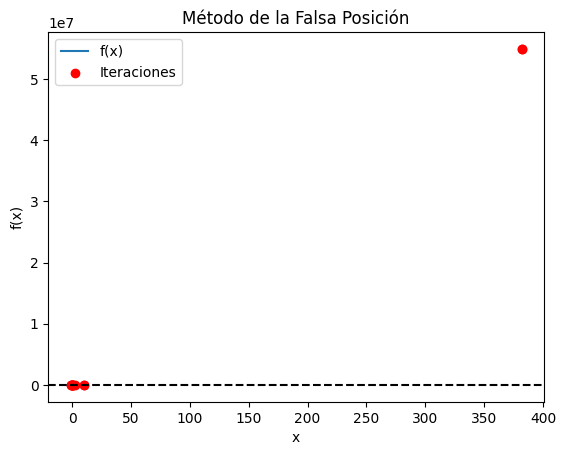


Tabla de datos:
+------------------+----------------------+----------------------+---------------------+-----------------------+
| Iteración        | a                    | b                    | Raíz aproximada     | Error                 |
+------------------+----------------------+----------------------+----------------------+----------------------+
|        1         |      0.00000000      |      4.00000000      |     381.81687924     |      4.00000000      |
|        2         |      2.50000000      |     -11.62500000     |     381.81687924     |     11.62500000      |
|        3         |      0.64000000      |      2.21414400      |     381.81687924     |      2.21414400      |
|        4         |      0.53760551      |      2.71028018      |     381.81687924     |      2.71028018      |
|        5         |      0.08064194      |      3.96800881      |     381.81687924     |      3.96800881      |
|        6         |     -1.12471908      |     -3.74772677      |     381.8168

In [82]:
def falsaPosicion(funcion, a, b, tolerancia, maximo):
    x_valor = [a, b]
    y_valor = [funcion(a), funcion(b)]

    for i in range(maximo):
        x_nuevo = (a * y_valor[-1] - b * y_valor[-2]) / (y_valor[-1] - y_valor[-2])
        y_nuevo = funcion(x_nuevo)

        x_valor.append(x_nuevo)
        y_valor.append(y_nuevo)

        if y_nuevo == 0 or abs(x_valor[-1] - x_valor[-2]) < tolerancia:
            break
        elif y_valor[-1] * y_valor[-2] < 0:
            b = x_nuevo
        else:
            a = x_nuevo

    root = x_valor[-1]
    return root, x_valor, y_valor

# Función de ejemplo
def ejemplo(x):
    return x**3 - 5*x**2 + 4

a = 0.0
b = 2.5
tolerancia = 0.01
maximo = 100

root, x_valor, y_valor = falsaPosicion(ejemplo, a, b, tolerancia, maximo)
print("Raíz aproximada:", root)

# Crear gráfica
x_rango = np.linspace(a, b, 400)
y_rango = ejemplo(x_rango)

plt.plot(x_rango, y_rango, label='f(x)')
plt.scatter(x_valor, y_valor, color='red', label='Iteraciones')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Método de la Falsa Posición')
plt.show()

# Crear tabla de datos
error = np.abs(np.array(y_valor))
print("\nTabla de datos:")
print("+------------------+----------------------+----------------------+---------------------+-----------------------+")
print("| Iteración        | a                    | b                    | Raíz aproximada     | Error                 |")
print("+------------------+----------------------+----------------------+----------------------+----------------------+")
for i in range(len(x_valor)):
    print(f"| {i+1:^16} | {x_valor[i]:^20.8f} | {y_valor[i]:^20.8f} | {root:^20.8f} | {error[i]:^20.8f} |")
print("+------------------+----------------------+----------------------+----------------------+----------------------+")


# **MÉTODO DE NEWTON RAPHSON**

Raíz aproximada: 2.0


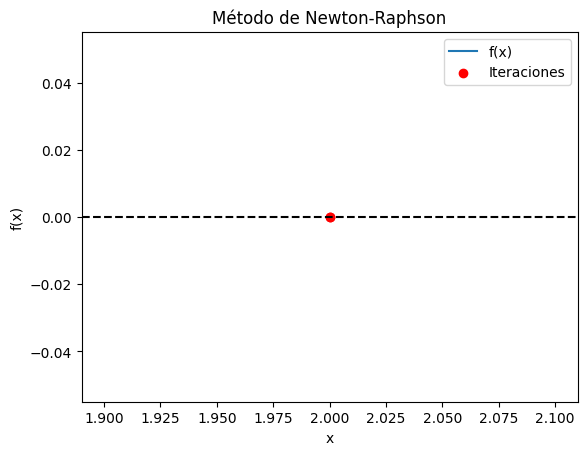


Tabla de datos:
+------------------+----------------------+----------------------+----------------------+
| Iteración        | x                    | f(x)                 | Error                |
+------------------+----------------------+----------------------+----------------------+
|        1         |      2.00000000      |    -154.00000000     |      0.00000000      |
|        2         |      2.00000000      |    -151.87970863     |      0.00000000      |
+------------------+----------------------+----------------------+----------------------+


In [ ]:
def newtonRaphson(funcion, derivada, estimacionInicial, tolerance, maximo):
    x_valor = [estimacionInicial]

    for i in range(maximo):
        x_new = x_valor[-1] - funcion(x_valor[-1]) / derivada(x_valor[-1])
        x_valor.append(x_new)

        if abs(x_valor[-1] - x_valor[-2]) < tolerance:
            break

    root = x_valor[-1]
    return root, x_valor

# Función de ejemplo y su derivada
def ejemplo(x):
    return x**3 - x**2 - 4

def ejemploDerivada(x):
    return 2*np.sin(x)-(x**2)/10

estimacionInicial = 2.0
tolerancia = 1e-6
maximo = 100

root, x_valor = newtonRaphson(ejemplo, ejemploDerivada, estimacionInicial, tolerancia, maximo)
print("Raíz aproximada:", root)

# Crear gráfica
x_range = np.linspace(min(x_valor), max(x_valor), 400)
y_range = ejemplo(x_range)

plt.plot(x_range, y_range, label='f(x)')
plt.scatter(x_valor, [ejemplo(x) for x in x_valor], color='red', label='Iteraciones')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Método de Newton-Raphson')
plt.show()

# Calcular y mostrar errores
error = np.abs(np.array([ejemplo(x) for x in x_valor]))
print("\nTabla de datos:")
print("+------------------+----------------------+----------------------+----------------------+")
print("| Iteración        | x                    | f(x)                 | Error                |")
print("+------------------+----------------------+----------------------+----------------------+")
for i in range(len(x_valor)):
    print(f"| {i+1:^16} | {x_valor[i]:^20.8f} | {ejemplo(x_vals[i]):^20.8f} | {error[i]:^20.8f} |")
print("+------------------+----------------------+----------------------+----------------------+")


# **MÉTODO DE BÚSQUEDA ALEATORIA**

Mejor solución encontrada en x: -1.4766744799523543
Valor mínimo: -0.249455920114507


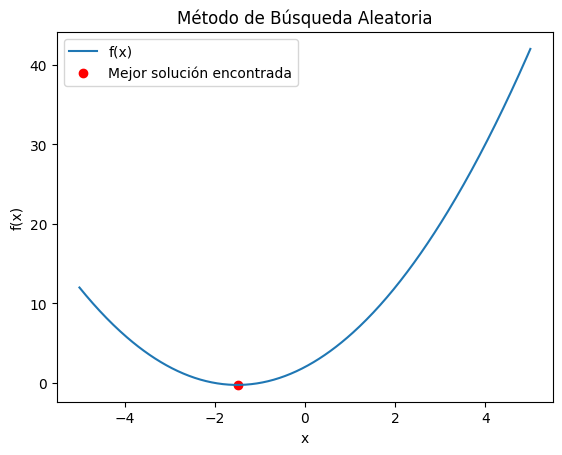


Tabla de datos:
+------------------+----------------------+----------------------+----------------------+
| Iteración        | Mejor solución (x)   | Valor mínimo (f(x))  | Error                |
+------------------+----------------------+----------------------+----------------------+
|      Final       |     -1.47667448      |     -0.24945592      |         N/A          |
+------------------+----------------------+----------------------+----------------------+


In [83]:
def busquedaAleatoria(function, search_range, num_samples):
    best_x = None
    best_y = float('inf')

    x_samples = np.random.uniform(search_range[0], search_range[1], num_samples)
    y_samples = function(x_samples)

    for i in range(num_samples):
        if y_samples[i] < best_y:
            best_x = x_samples[i]
            best_y = y_samples[i]

    return best_x, best_y

# Función de ejemplo
def example_function(x):
    return x**2 + 3*x + 2

search_range = (-5.0, 5.0)
num_samples = 100
max_iterations = 100

best_x, best_y = busquedaAleatoria(example_function, search_range, num_samples)
print("Mejor solución encontrada en x:", best_x)
print("Valor mínimo:", best_y)

# Crear gráfica
x_vals = np.linspace(search_range[0], search_range[1], 400)
y_vals = example_function(x_vals)

plt.plot(x_vals, y_vals, label='f(x)')
plt.scatter(best_x, best_y, color='red', label='Mejor solución encontrada')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Método de Búsqueda Aleatoria')
plt.show()

# Crear tabla de datos
error = np.abs(best_y - y_vals)
print("\nTabla de datos:")
print("+------------------+----------------------+----------------------+----------------------+")
print("| Iteración        | Mejor solución (x)   | Valor mínimo (f(x))  | Error                |")
print("+------------------+----------------------+----------------------+----------------------+")
print(f"| {'Final':^16} | {best_x:^20.8f} | {best_y:^20.8f} | {'N/A':^20} |")
print("+------------------+----------------------+----------------------+----------------------+")


   Iteración  Aproximación al Mejor Valor  Error en la Iteración
0          1                   -15.155293              16.221760
1          2                    -0.312515               1.378981
2          3                    -0.312515               3.255423
3          4                    -0.312515               1.725875
4          5                    -0.312515               4.753006
5          6                     1.066467               0.000000
6          7                     1.066467               3.254603
7          8                     1.066467               5.772648
8          9                     1.066467               1.378522
9         10                     1.066467              14.844747


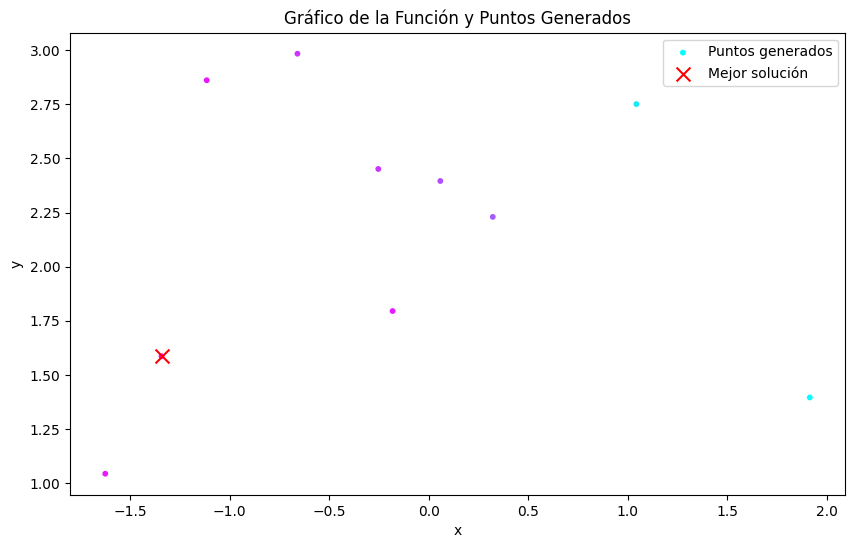

El valor máximo de fn es: 1.0664669231766437
Se obtiene cuando x = -1.3431366017829363 y y = 1.586640306799528


In [88]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

maxf = -1E9
n = 10

x_values = []
y_values = []
fn_values = []
approximations = []

for j in range(n):
    x = -2 + 4 * random.random()
    y = 1 + 2 * random.random()
    fn = y - x - 2 * x**2 - 2 * x * y - y**2
    if fn > maxf:
        maxf = fn
        maxx = x
        maxy = y
    x_values.append(x)
    y_values.append(y)
    fn_values.append(fn)
    approximations.append(maxf)

# Crear una malla de puntos para la función
x_mesh = np.linspace(-2, 2, 400)
y_mesh = np.linspace(1, 3, 400)
X, Y = np.meshgrid(x_mesh, y_mesh)
Z = Y - X - 2 * X**2 - 2 * X * Y - Y**2

# Crear un DataFrame con los datos
data = {
    'Iteración': range(1, n + 1),
    'Aproximación al Mejor Valor': approximations,
    'Error en la Iteración': [maxf - fn for fn in fn_values]
}
df = pd.DataFrame(data)

# Mostrar la tabla de datos
print(df)

# Graficar la función y los puntos
plt.figure(figsize=(10, 6))

plt.scatter(x_values, y_values, c=fn_values, cmap='cool', marker='o', s=10, label='Puntos generados')
plt.scatter(maxx, maxy, c='red', marker='x', s=100, label='Mejor solución')
plt.title('Gráfico de la Función y Puntos Generados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("El valor máximo de fn es:", maxf)
print("Se obtiene cuando x =", maxx, "y y =", maxy)
